In [2]:
import numpy as np
import math
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
#选择了自己出生那年全球的地表径流数据进行分析
ds = xr.open_dataset("RUNOFF_1998.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lon: 360, lat: 150)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-16T10:30:00 ... 1998-12-16T10:30:00
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 -59.5 -58.5 -57.5 -56.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    ro         (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Nov 10 15:20:16 2020: cdo -s -f nc4 -z zip remap,grid_1...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

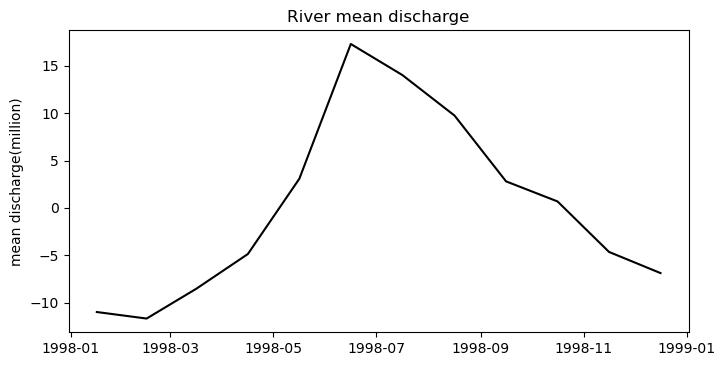

In [4]:
#calculate the mean of the month data, Plot a time series of runoff
mean=ds.ro.mean()
time=ds['time']
ro_mean=ds.ro.mean(dim=['lat', 'lon'])-mean
#距平 and plot the figure
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(time,ro_mean,'k')
plt.title("River mean discharge",fontsize=12)
plt.ylabel('mean discharge(million)')
plt.show()

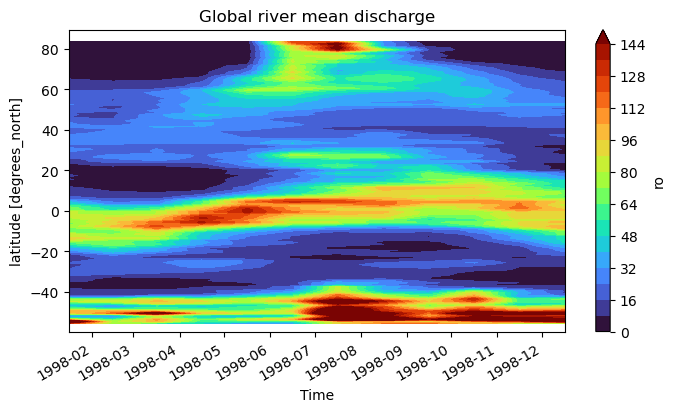

In [5]:
#plot the each longtide mean discharge
fig = plt.figure(figsize=(8,4), dpi=100)
ds.ro.mean(dim='lon').transpose().plot.contourf(levels=20, robust=True, cmap='turbo')
plt.title("Global river mean discharge",fontsize=12)
plt.show()

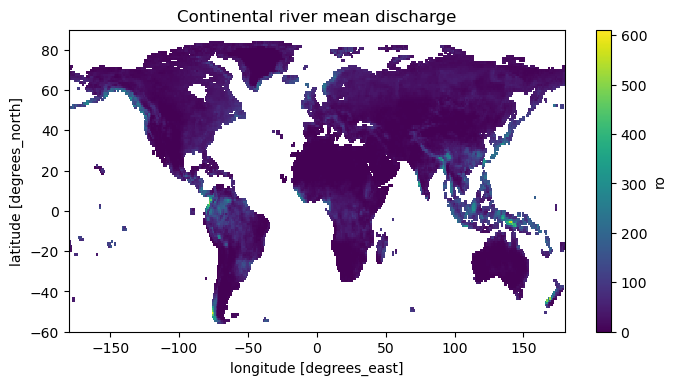

In [40]:
#calculate the continental river mean discharge
fig = plt.figure(figsize=(8,4), dpi=100)
ds.ro.mean(dim=['time']).plot()
plt.title("Continental river mean discharge",fontsize=12)
plt.show()

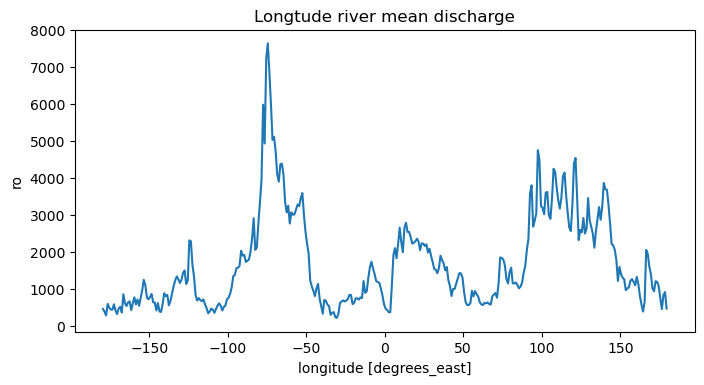

In [41]:
#calculate the longtude rver mean discharge
fig = plt.figure(figsize=(8,4), dpi=100)
sum_lat=ds.ro.sum(['lat']).mean(['time']).plot()
plt.title("Longtude river mean discharge",fontsize=12)
plt.show()

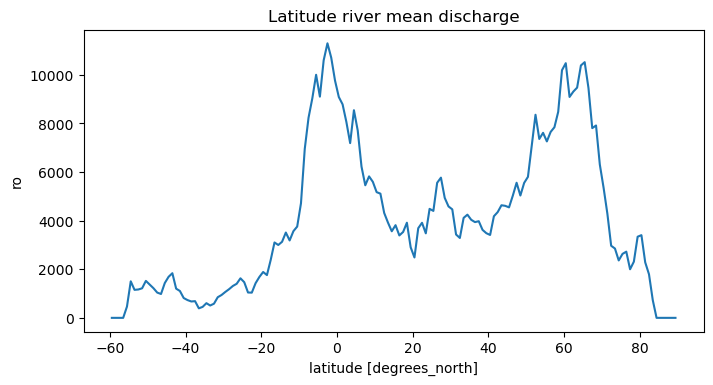

In [6]:
#calculate the latitude rver mean discharge
fig = plt.figure(figsize=(8,4), dpi=100)
sum_lon=ds.ro.sum(['lon']).mean(['time']).plot()
plt.title("Latitude river mean discharge",fontsize=12)
plt.show()

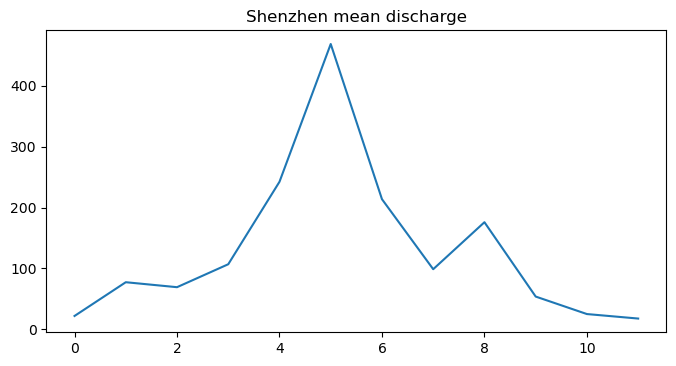

In [42]:
##calculate the rver mean discharge in Shenzhen
fig = plt.figure(figsize=(8,4), dpi=100)
region = ds.ro.sel(lon=114, lat=22,method='nearest')
plt.plot(region)
plt.title("Shenzhen mean discharge",fontsize=12)
plt.show()